# 1.4.9 Contours in OpenCV

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('./Image/opencv_logo.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

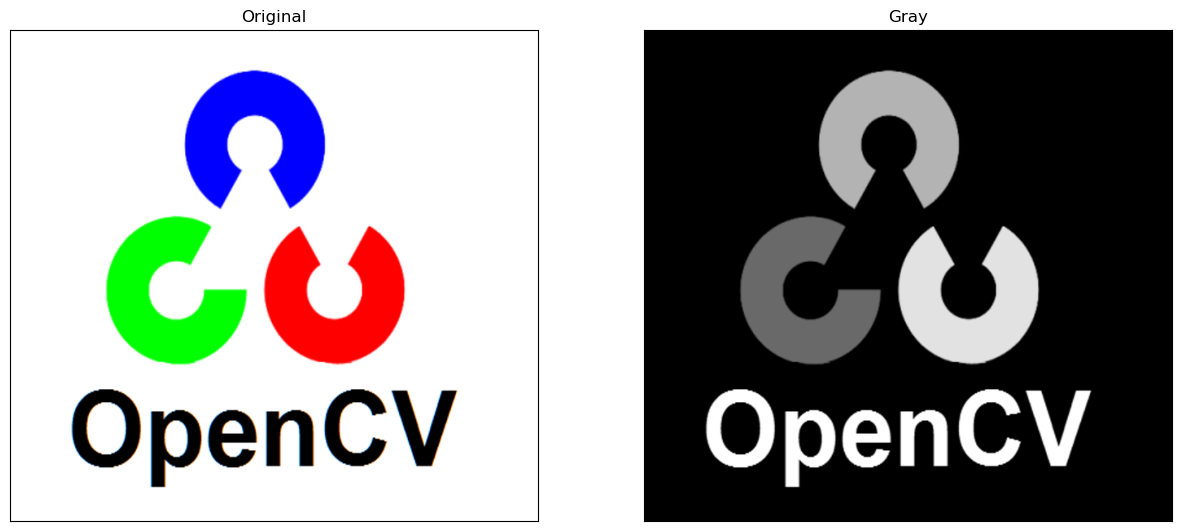

In [4]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

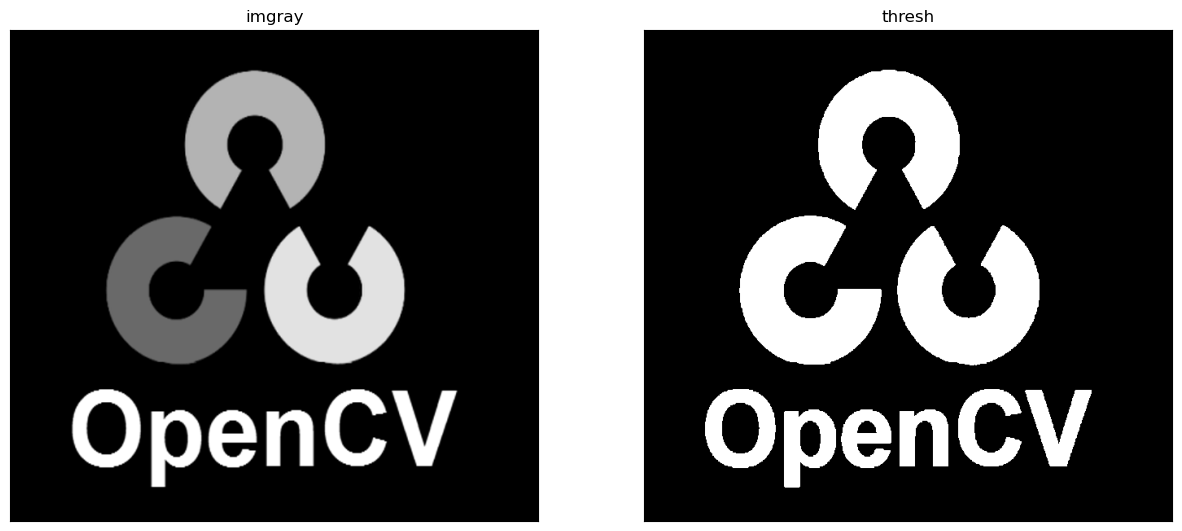

In [6]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

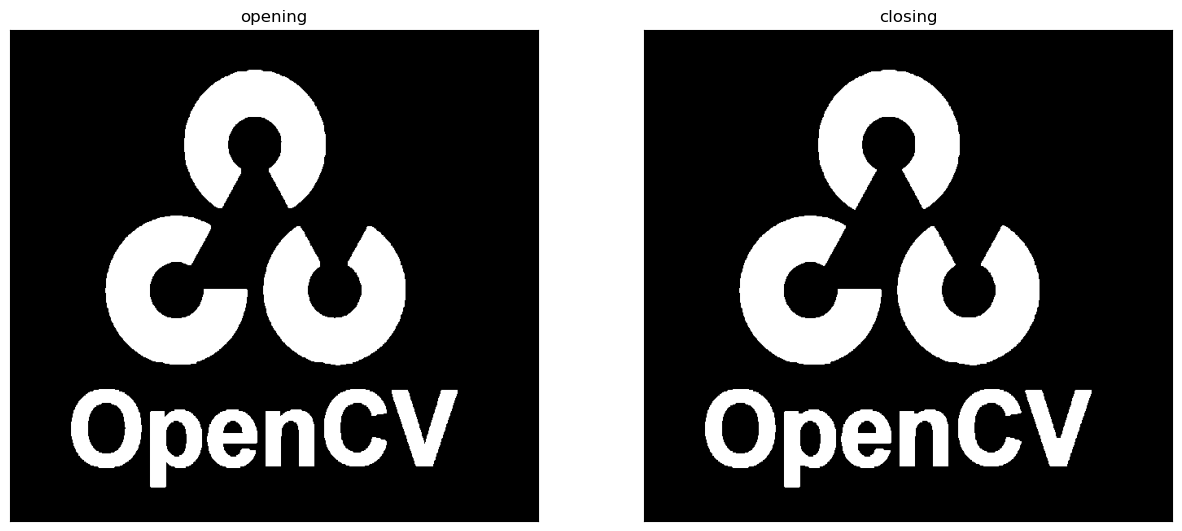

In [8]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,255), 3)
img = cv2.imread('./Image/opencv_logo.png')

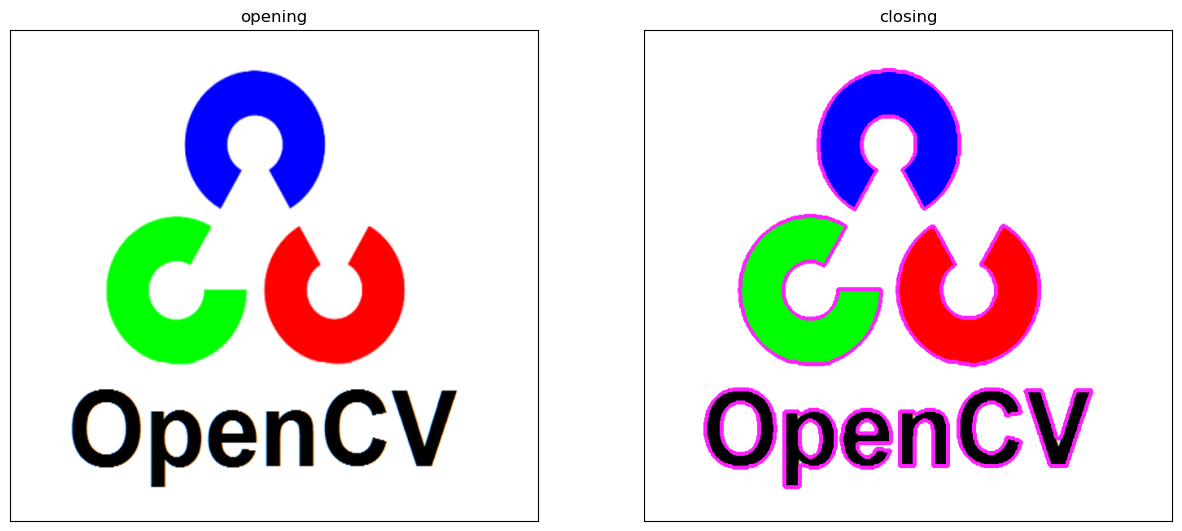

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
cnt = contours[9]
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [19]:
imgcontour = cv2.imread('./Image/opencv_logo.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('./Image/opencv_logo.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('./Image/opencv_logo.png')

In [20]:
cnt.shape, approx.shape

((364, 1, 2), (15, 1, 2))

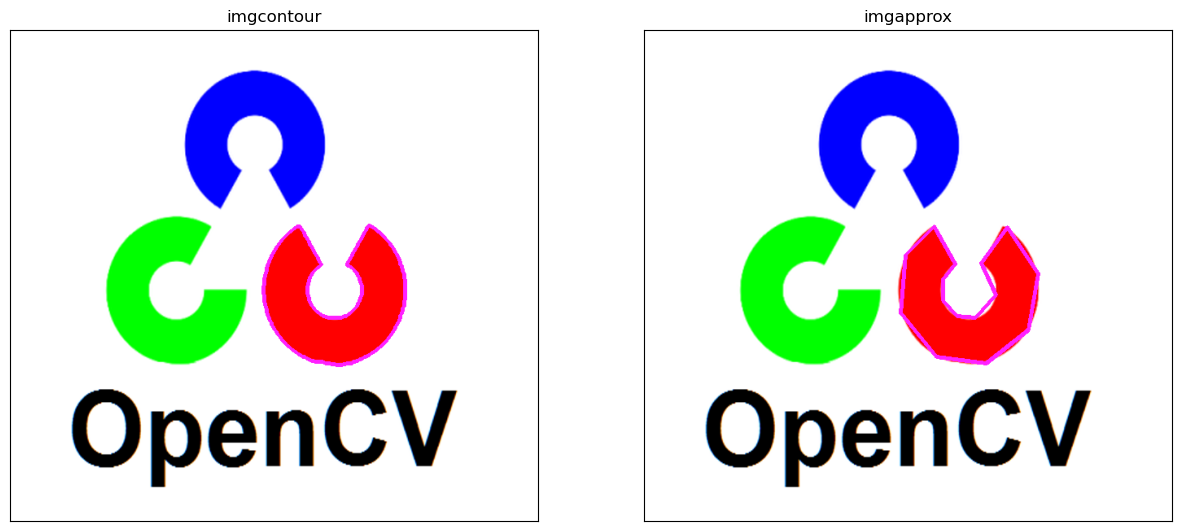

In [21]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
hull = cv2.convexHull(approx)

In [25]:
imghull = cv2.imread('./Image/opencv_logo.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

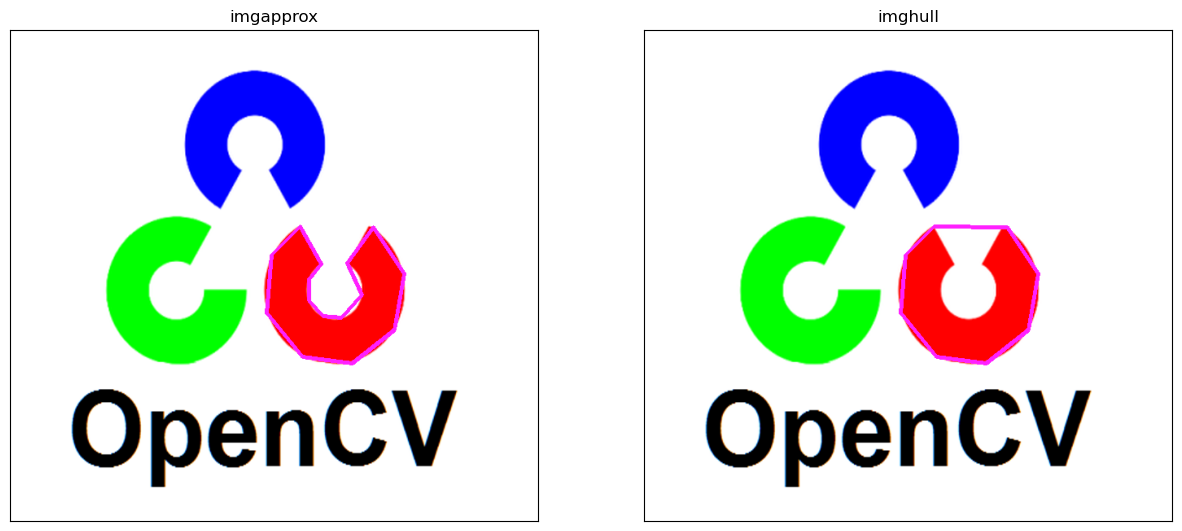

In [26]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('./Image/opencv_logo.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

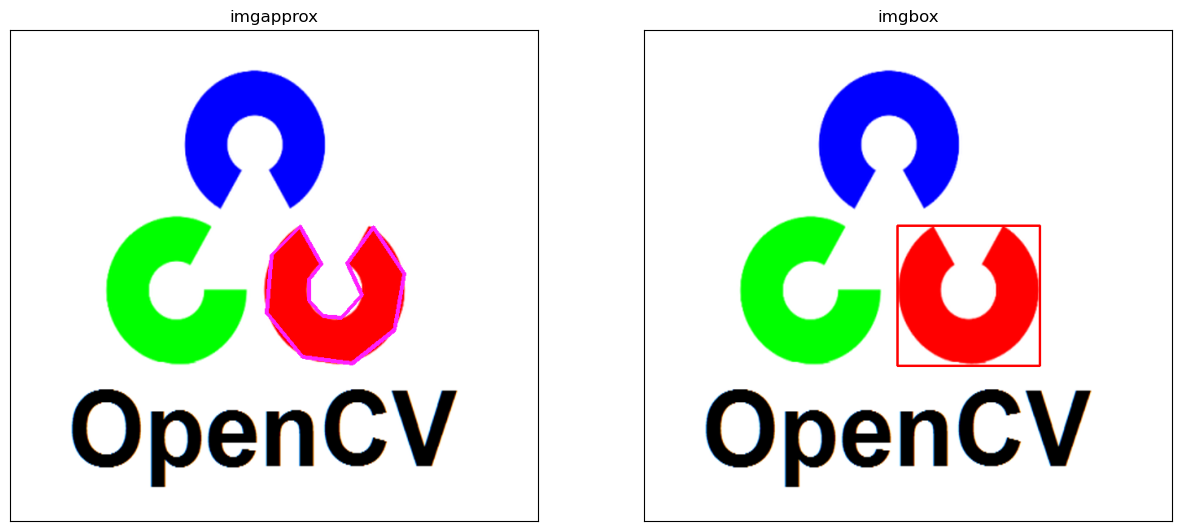

In [28]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
imgcontour = cv2.imread('./Image/opencv_logo.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

C:\Users\HP\AppData\Local\Temp\ipykernel_27864\1457711930.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


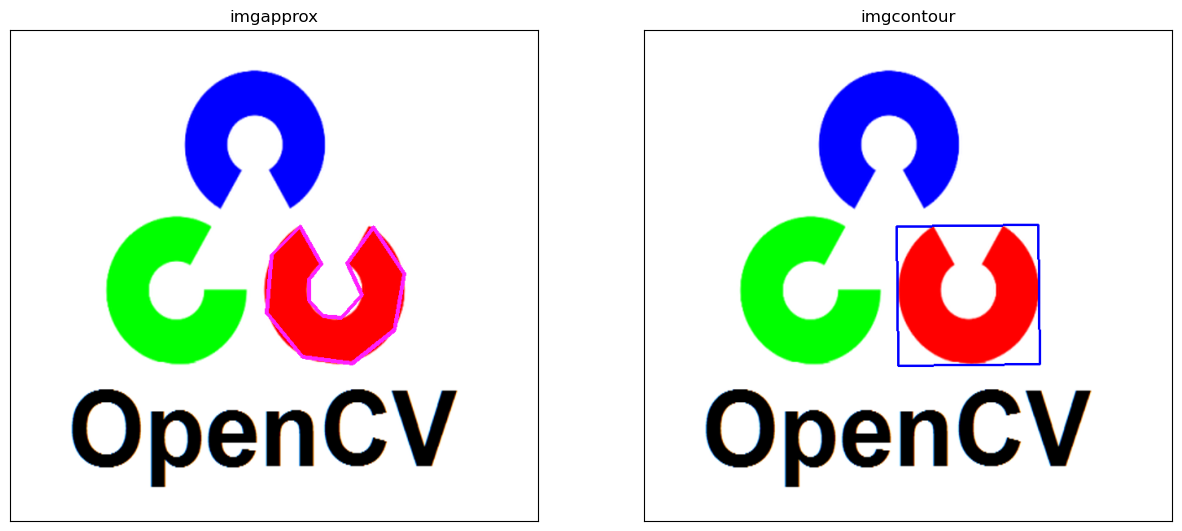

In [31]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 17881.0, 'm10': 7124025.333333333, 'm01': 5941729.166666666, 'm20': 2883228537.5, 'm11': 2367213298.333333, 'm02': 2007501180.6666665, 'm30': 1184499649471.0, 'm21': 957562649618.7167, 'm12': 799789042474.9166, 'm03': 688893186298.65, 'mu20': 44923244.17327833, 'mu11': -49668.34296512604, 'mu02': 33106824.086086273, 'mu30': -12503206.787841797, 'mu21': -474116689.7856121, 'mu12': 7204989.216836929, 'mu03': -187507278.94091797, 'nu20': 0.1405036172776904, 'nu11': -0.00015534456558549708, 'nu02': 0.10354614022818534, 'nu30': -0.00029244345490641883, 'nu21': -0.011089340930082486, 'nu12': 0.00016852092226325458, 'nu03': -0.004385696997901837}


In [33]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [34]:
area = cv2.contourArea(cnt)

In [35]:
perimeter = cv2.arcLength(cnt,True)

In [36]:
imginfo = cv2.imread('./Image/opencv_logo.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

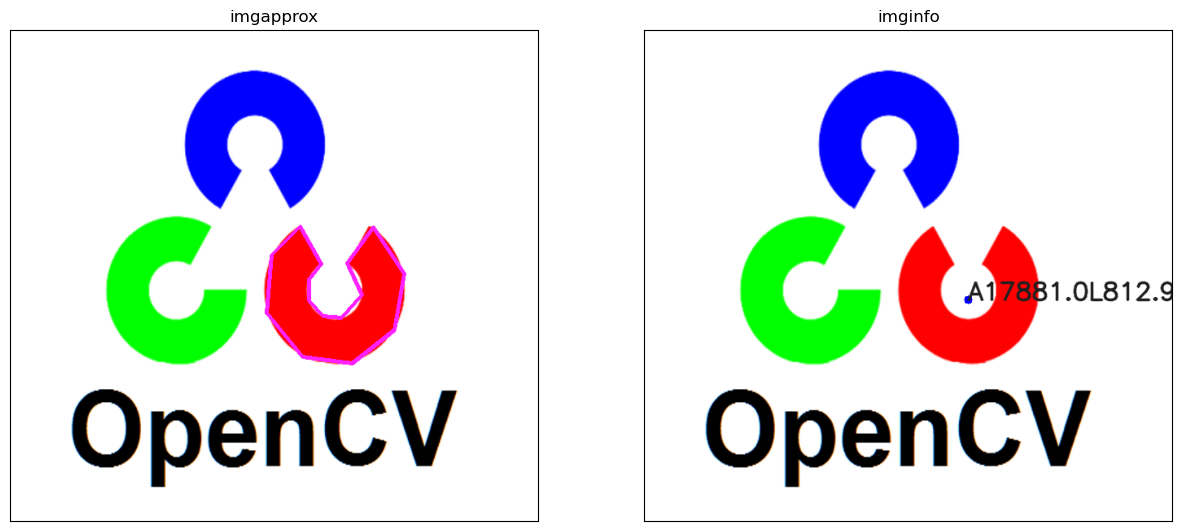

In [37]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()